## Linear Regression

#### Normal Equation

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

In [4]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100, 1)

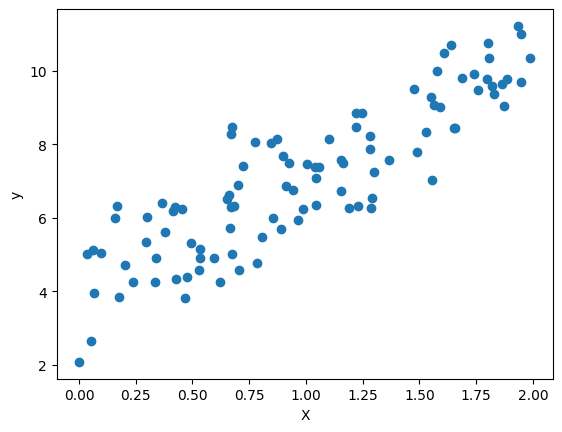

In [5]:
plt.scatter(x=X, y=y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [6]:
X_b = np.c_[np.ones_like(X), X]

In [7]:
#using normal equation to find the best theta to minimize the cost function
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.97784951],
       [3.14486637]])

In [8]:
X_ = np.array([[0], [2]])
X_ = np.c_[np.ones_like(X_), X_].T
X_.shape

(2, 2)

In [9]:
y_hat = np.matmul(theta_best.T, X_)

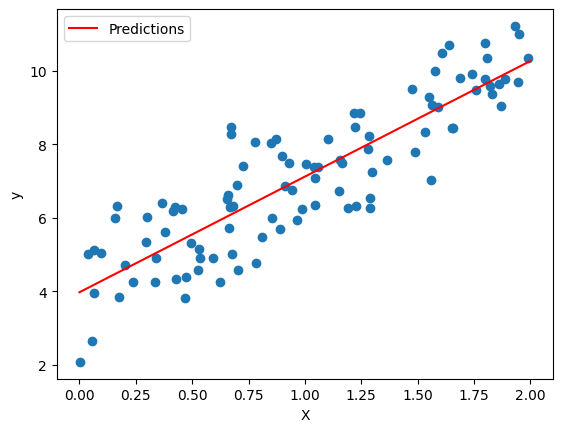

In [10]:
plt.scatter(x=X, y=y)
plt.plot([0,2], y_hat.flatten(), color='red', label='Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Linear Regression using scikit-learn

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lin_reg = LinearRegression(n_jobs=-1)

In [13]:
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.97784951]), array([[3.14486637]]))

In [14]:
lin_reg.predict(np.array([[0],[2]]))

array([[ 3.97784951],
       [10.26758225]])

In [15]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.97784951],
       [3.14486637]])

In [16]:
np.linalg.pinv(X_b).dot(y)

array([[3.97784951],
       [3.14486637]])

#### Gradient Descent

In [17]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

In [18]:
theta = np.random.randn(2,1)

In [19]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) -y)
    theta = theta - eta * gradients

In [20]:
theta

array([[3.97784951],
       [3.14486637]])

In [21]:
# Stochastic Gradient Descent
n_epochs = 50
t0, t1 = 5,50 # learning schedule hyperparameters

In [22]:
def learning_schedule(t):
    return t0 / (t +t1)

In [23]:
theta = np.random.randn(2,1)

In [24]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [25]:
theta

array([[3.98224214],
       [3.18461802]])

In [26]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3,penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [27]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.99969923]), array([3.15741461]))

#### Polynomial Regression

In [28]:
# generating nonlinear data
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + 2 + np.random.randn(m,1)

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
poly_features = PolynomialFeatures(degree=2, include_bias= False)

In [31]:
X_poly=poly_features.fit_transform(X)

In [32]:
X[0]

array([1.96185253])

In [33]:
X_poly[0]

array([1.96185253, 3.84886535])

In [34]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.90590544]), array([[-0.0141132 ,  0.49528144]]))

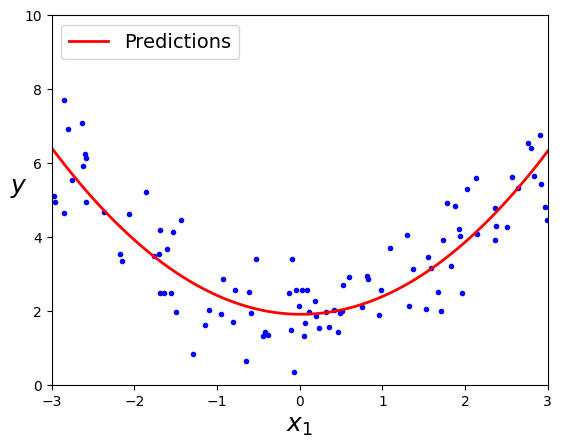

In [35]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

#### Learning Curves

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

(0.0, 80.0, 0.0, 3.0)

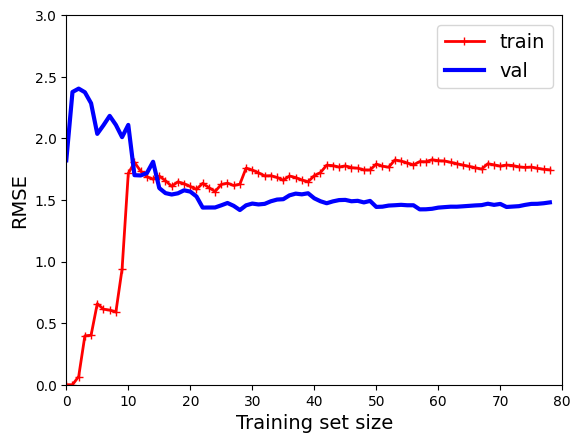

In [37]:
# linear regression
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])    

(0.0, 80.0, 0.0, 3.0)

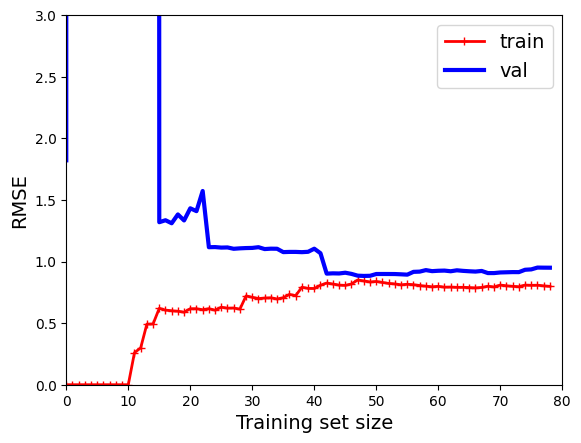

In [38]:
#polynomial regression
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])          

### Regularized Linear Models
- reducing the number os polynomial degrees in order to fight overfitting 

#### Ridge Regression - l2 norm

In [39]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")

In [64]:
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[8.54870271]])

Stochastic Gradient Descent as ridge regressios

In [63]:
sgd_reg = SGDRegressor(penalty="l2") # simply Ridge Regression
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([8.7145168])

#### Lasso Regression 
- feature selection: tends to eliminate the weights of the least important features(set to zero)

In [62]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([8.40808875])

#### Elastic Net
- mix ridge and lasso regression
- when r = 0 --> ridge regression
- when r = 1 --> Lasso regression

In [61]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([8.24979477])

#### Early Stopping

In [67]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

# prepare the data
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

In [68]:
sgd_reg = SGDRegressor(
    max_iter=1,
    tol=-np.infty,
    warm_start=True,
    penalty=None,
    learning_rate='constant',
    eta0=0.0005
)

In [69]:
minimum_val_error = float("inf")
best_epoch, best_model = None, None

In [70]:
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel()) # continue where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch